In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

Description of the dataset and a summary of its attributes

In [10]:
titanic_df = pd.read_csv('train.csv')
print("Dataset Summary:")
print(titanic_df.info())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Plan for data exploration
1. Taking care of missing values
2. Feature encoding

In [11]:
print("\nData Exploration:")
print("Number of rows and columns:", titanic_df.shape)
print("\nSummary Statistics:")
print(titanic_df.describe())
print("\nHead of the DataFrame:")
print(titanic_df.head())


Data Exploration:
Number of rows and columns: (891, 12)

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

He

Let's handle missing values in 'Age' and 'Embarked' columns

In [12]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


Let's convert categorical variables into numerical representations

In [13]:
sex_mapping = {'male': 0, 'female': 1}
titanic_df['Sex'] = titanic_df['Sex'].map(sex_mapping)

embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
titanic_df['Embarked'] = titanic_df['Embarked'].map(embarked_mapping)

Key Findings and Insights

In [14]:
print("\nKey Findings and Insights:")

survival_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Sex:")
print(survival_by_sex)

survival_by_pclass = titanic_df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Ticket Class:")
print(survival_by_pclass)


Key Findings and Insights:
Survival Rate by Sex:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

Survival Rate by Ticket Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Visualization of the distribution of age among survivors and non-survivors

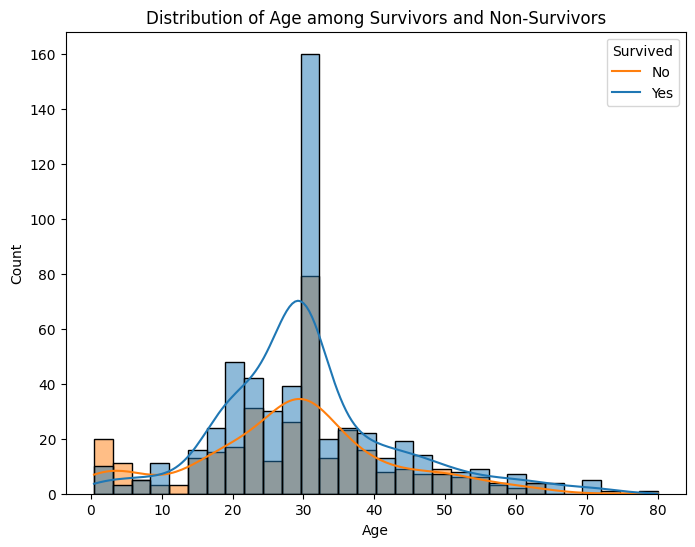

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Distribution of Age among Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Formulated hypotheses about this data:

    Hypothesis 1: Passengers in higher classes (Pclass = 1) had a higher chance of survival.

    Hypothesis 2: Female passengers had a higher chance of survival than male passengers.

    Hypothesis 3: Passengers who boarded from Cherbourg (Embarked = 0) had a higher chance of survival.

Let's conduct a significance test to examine the relationship between sex and survival.

In [16]:
contingency_table = pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("\nSignificance Test (Sex vs. Survival):")
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

if p_value < 0.05:
    print("The relationship between sex and survival is statistically significant.")
else:
    print("The relationship between sex and survival is not statistically significant.")



Significance Test (Sex vs. Survival):
Chi-Square Statistic: 260.71702016732104
P-value: 1.1973570627755645e-58
The relationship between sex and survival is statistically significant.
